# **Plot skin friction Cf for the new solver**

Momentum Equation (with surfaceScalarField nuEff)

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# increase dpi and use latex rendering
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

# Set macro for paths
run = "../run/"

In [2]:
UInf = 69.4
nuInf = 1.388e-05

model_sa = "SpalartAllmaras"
yp = ['0.05', '1', '2', '5', '10', '30', '50', '100']
res_list = ['1e-5']

In [3]:
tauw_path = [run + 'turbulentFlatPlate_SA_noWallFunc/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data = [pd.read_csv(tauw_path[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.3374,-0.943654,0
1,0.001458,-21.1201,-0.004816,0
2,0.002433,-16.4140,-0.000939,0
3,0.003410,-14.7323,-0.000377,0
4,0.004390,-13.8445,-0.000209,0


In [4]:
tauw_path_fvc = [run + 'turbulentFlatPlate_withfvc_surf/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_fvc = [pd.read_csv(tauw_path_fvc[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_fvc[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.3373,-0.943653,0
1,0.001458,-21.1201,-0.004816,0
2,0.002433,-16.4140,-0.000939,0
3,0.003410,-14.7323,-0.000377,0
4,0.004390,-13.8445,-0.000209,0


In [5]:
tauw_path_nofvc = [run + 'turbulentFlatPlate_nofvc_surf/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_nofvc = [pd.read_csv(tauw_path_nofvc[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_nofvc[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.3268,-0.942574,0
1,0.001458,-21.1177,-0.006935,0
2,0.002433,-16.4126,-0.001359,0
3,0.003410,-14.7316,-0.000546,0
4,0.004390,-13.8441,-0.000303,0


In [6]:
tauw_path_fvc_vol = [run + 'turbulentFlatPlate_withfvc_vol/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_fvc_vol = [pd.read_csv(tauw_path_fvc_vol[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_fvc_vol[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.3373,-0.943653,0
1,0.001458,-21.1201,-0.004816,0
2,0.002433,-16.4140,-0.000939,0
3,0.003410,-14.7323,-0.000377,0
4,0.004390,-13.8445,-0.000209,0


In [7]:
tauw_path_nofvc_vol = [run + 'turbulentFlatPlate_nofvc_vol/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_nofvc_vol = [pd.read_csv(tauw_path_nofvc_vol[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_nofvc_vol[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.3268,-0.942574,0
1,0.001458,-21.1177,-0.006935,0
2,0.002433,-16.4126,-0.001359,0
3,0.003410,-14.7316,-0.000546,0
4,0.004390,-13.8441,-0.000303,0


In [8]:
x0 = 0
Rex = (tauw_data[0]['ccx'] - x0)*UInf/nuInf
Cf = [np.sqrt(tauw_data[i + len(res_list)*j]['tau_xx']**2 + tauw_data[i + len(res_list)*j]['tau_yy']**2 + tauw_data[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_fvc = [np.sqrt(tauw_data_fvc[i + len(res_list)*j]['tau_xx']**2 + tauw_data_fvc[i + len(res_list)*j]['tau_yy']**2 + tauw_data_fvc[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_nofvc = [np.sqrt(tauw_data_nofvc[i + len(res_list)*j]['tau_xx']**2 + tauw_data_nofvc[i + len(res_list)*j]['tau_yy']**2 + tauw_data_nofvc[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_fvc_vol = [np.sqrt(tauw_data_fvc_vol[i + len(res_list)*j]['tau_xx']**2 + tauw_data_fvc_vol[i + len(res_list)*j]['tau_yy']**2 + tauw_data_fvc_vol[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_nofvc_vol = [np.sqrt(tauw_data_nofvc_vol[i + len(res_list)*j]['tau_xx']**2 + tauw_data_nofvc_vol[i + len(res_list)*j]['tau_yy']**2 + tauw_data_nofvc_vol[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]

In [9]:
wieghardt = 0.288*(np.log10(Rex))**(-2.45)

## Plot

### Comparison between the original and the modified model

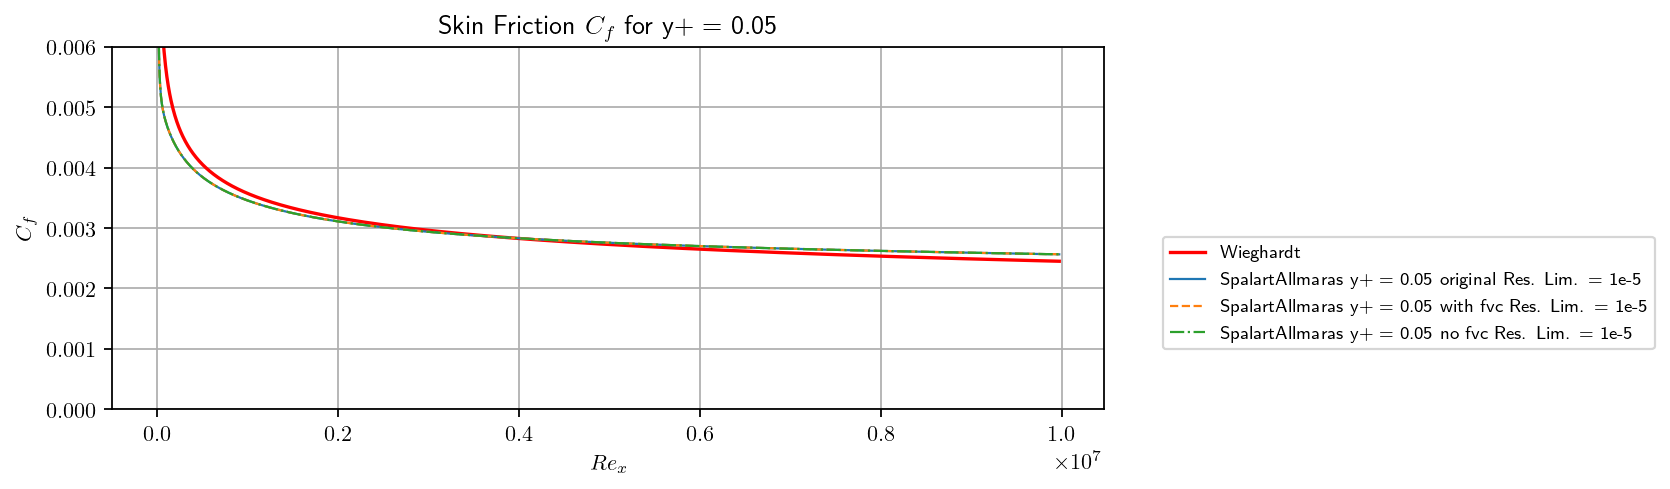

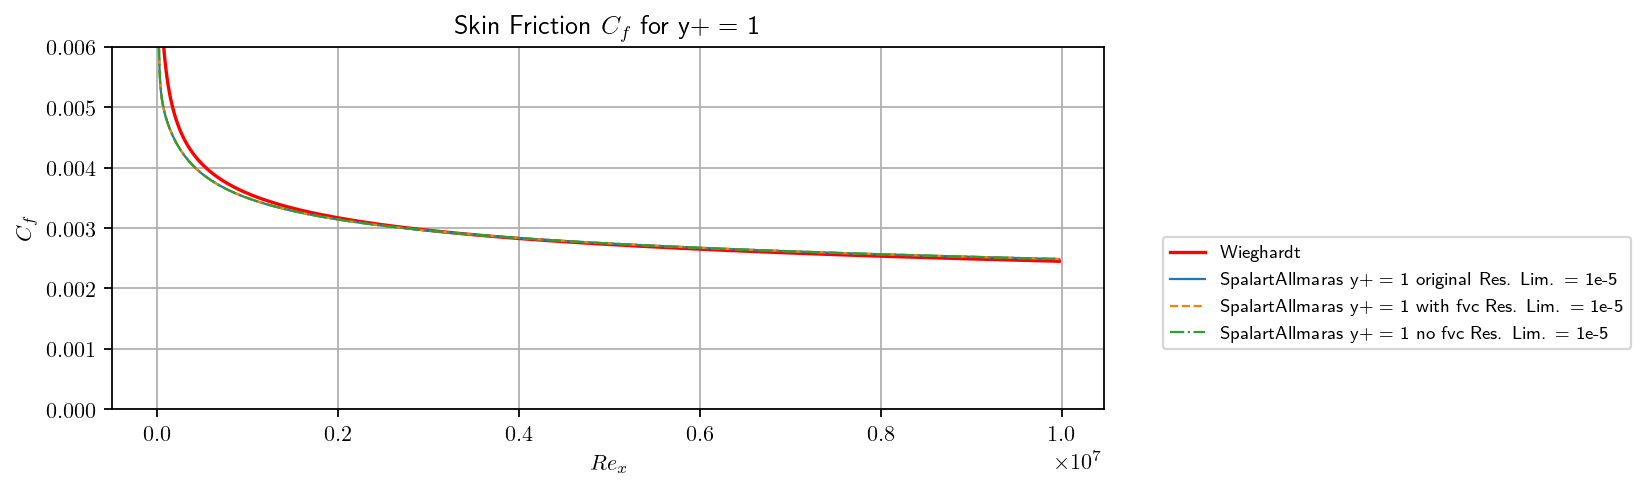

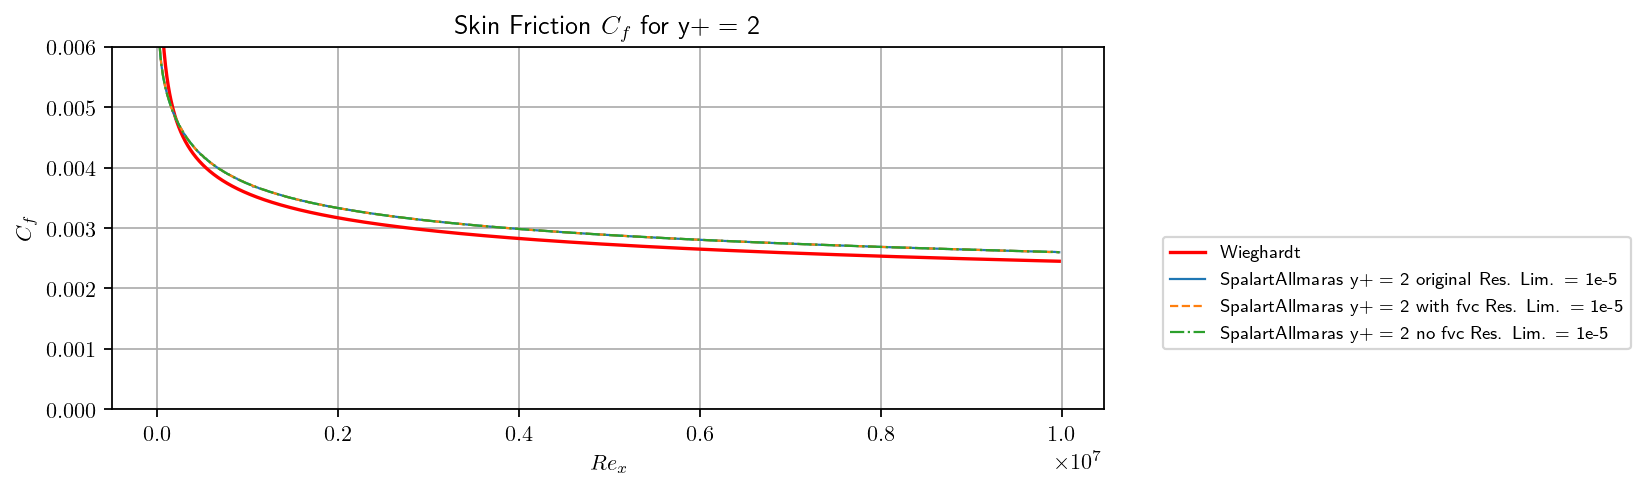

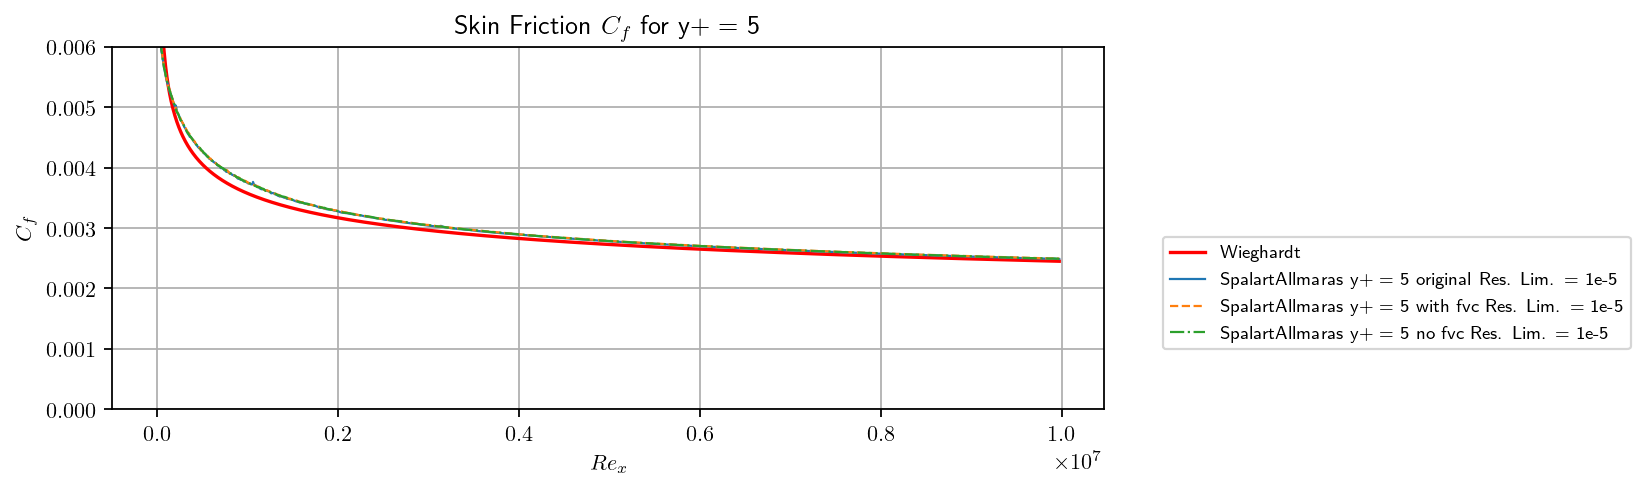

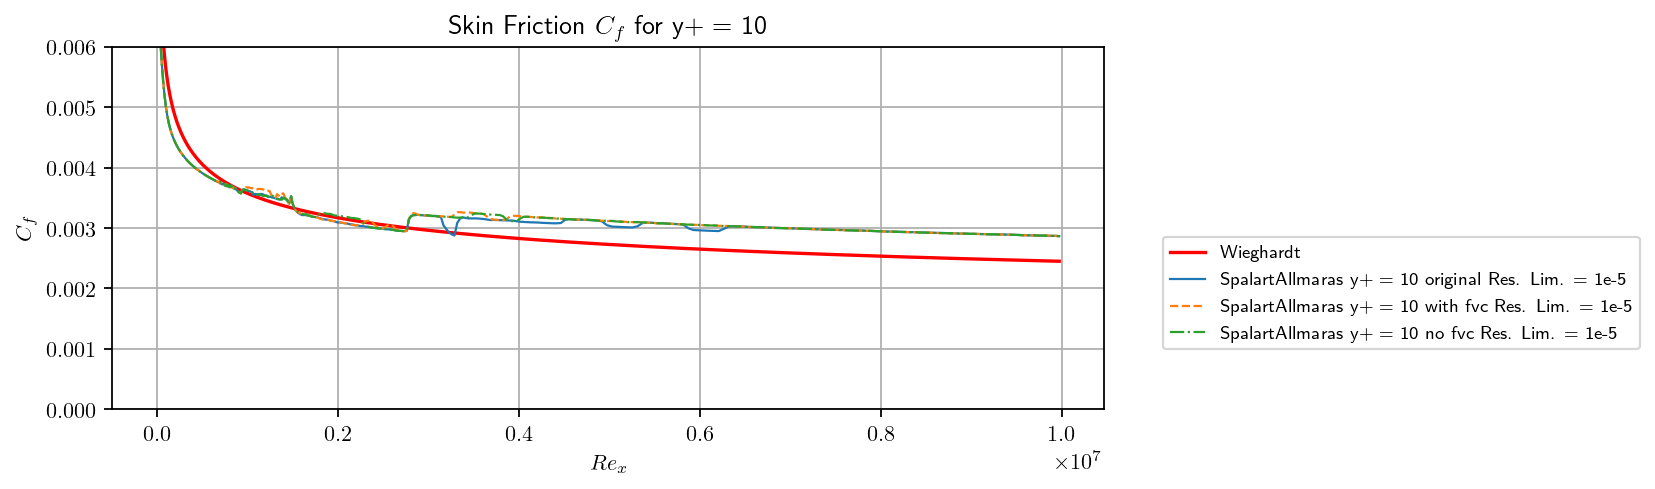

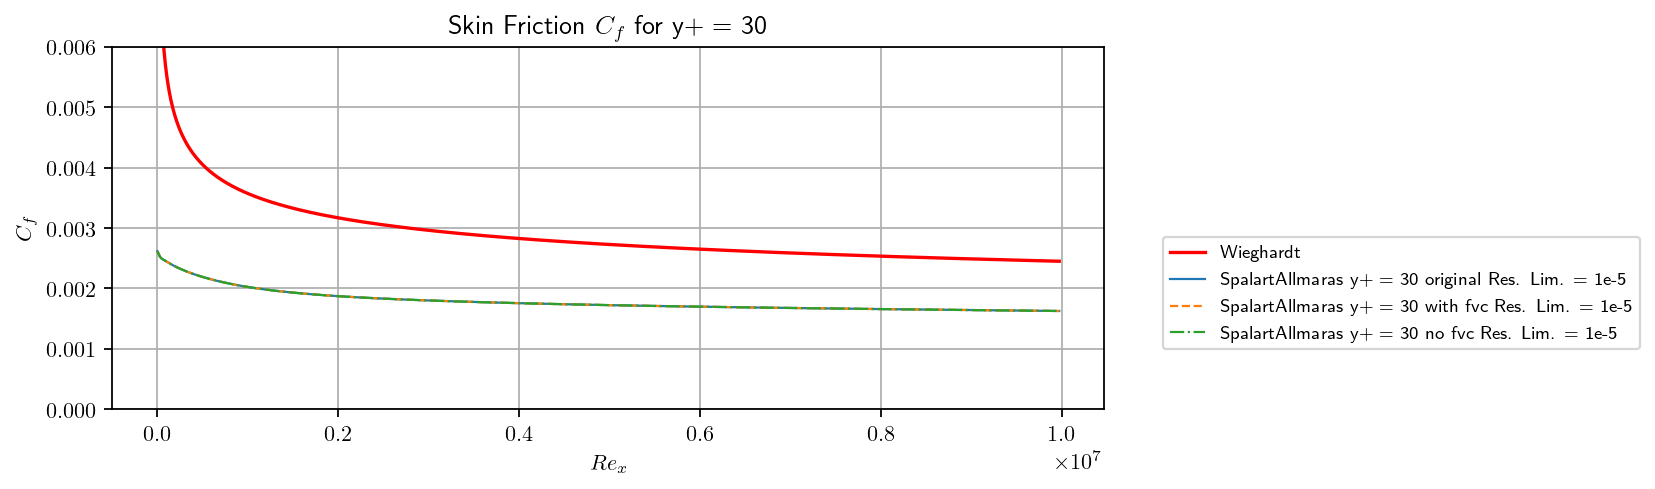

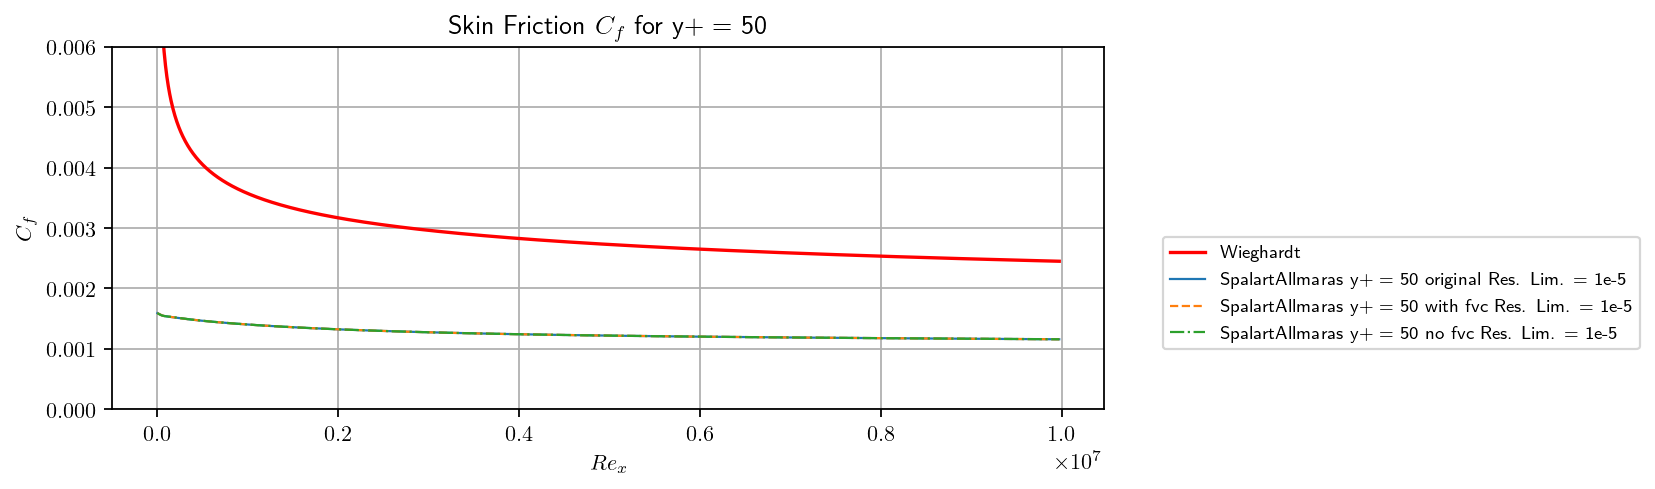

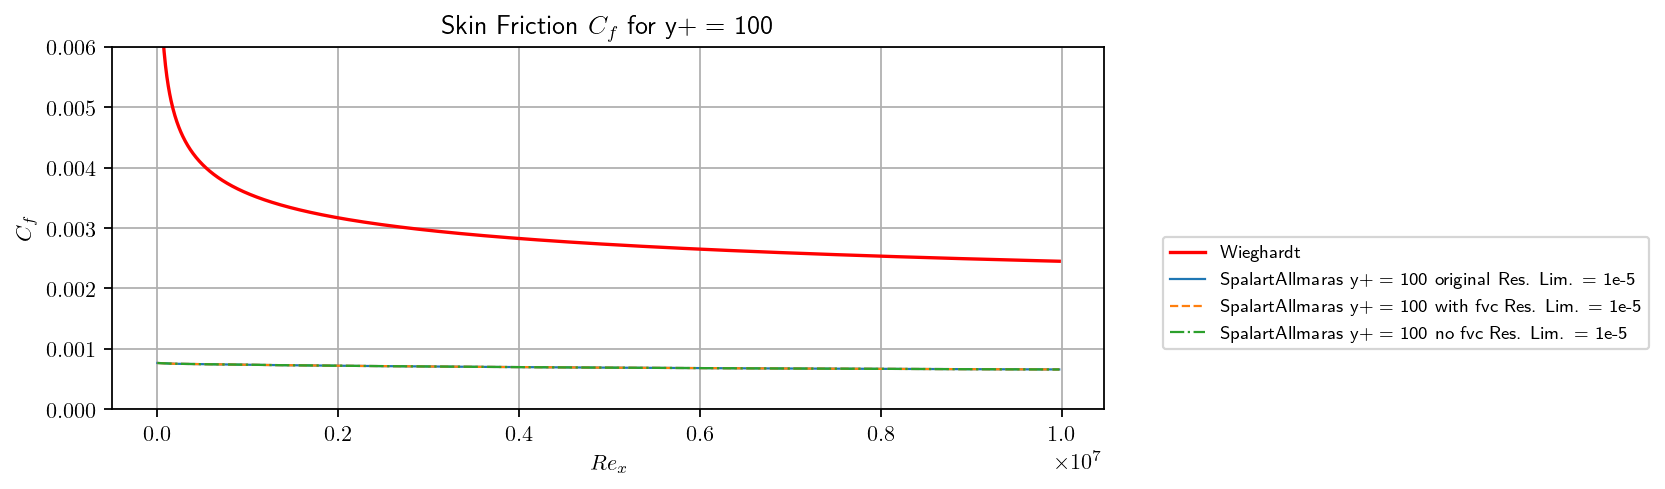

In [10]:
style = ["-", "--", "-.", ":"]
lw = 1.0
for j in range(len(yp)):
    fig, ax = plt.subplots(1, 1, figsize=(8, 3))
    plt.ylim([0, 0.006])
    plt.grid()
    ax.set_xlabel(r"$Re_x$")
    ax.set_ylabel(r"$C_f$")
    plt.title(r"Skin Friction $C_f$ for y+ = {}".format(yp[j]))
    ax.plot(Rex, wieghardt, color = "r", label = "Wieghardt")    
    for i in range(len(res_list)):
        ax.plot(Rex, Cf[i + len(res_list)*j], label = "{} y+ = {} original Res. Lim. = 1e-5".format(model_sa, yp[j]), ls = style[i], c = "C{:d}".format(i), lw = lw)
        ax.plot(Rex, Cf_fvc[i + len(res_list)*j], label = "{} y+ = {} with fvc Res. Lim. = 1e-5".format(model_sa, yp[j]), ls = style[i+1], c = "C{:d}".format(i+1), lw = lw)
        ax.plot(Rex, Cf_nofvc[i + len(res_list)*j], label = "{} y+ = {} no fvc Res. Lim. = 1e-5".format(model_sa, yp[j]), ls = style[i+2], c = "C{:d}".format(i+2), lw = lw)        
        ax.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.5))        

### Comparison between the *volScalarField* term and the *surfaceScalarField* term

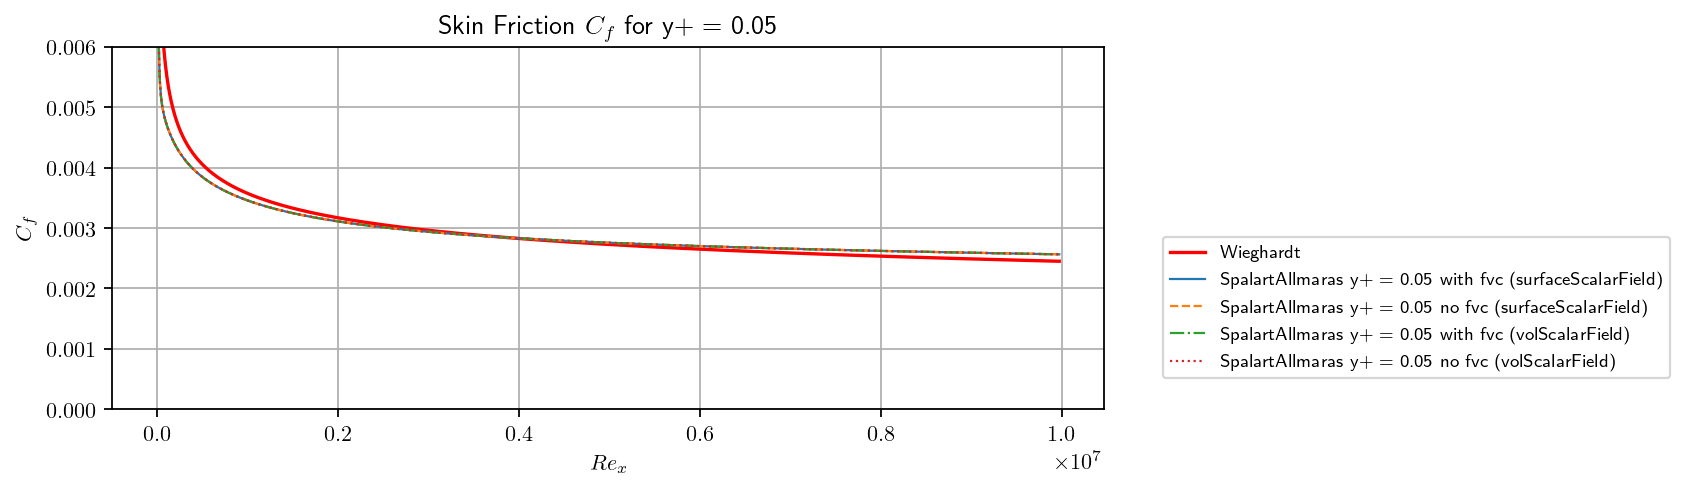

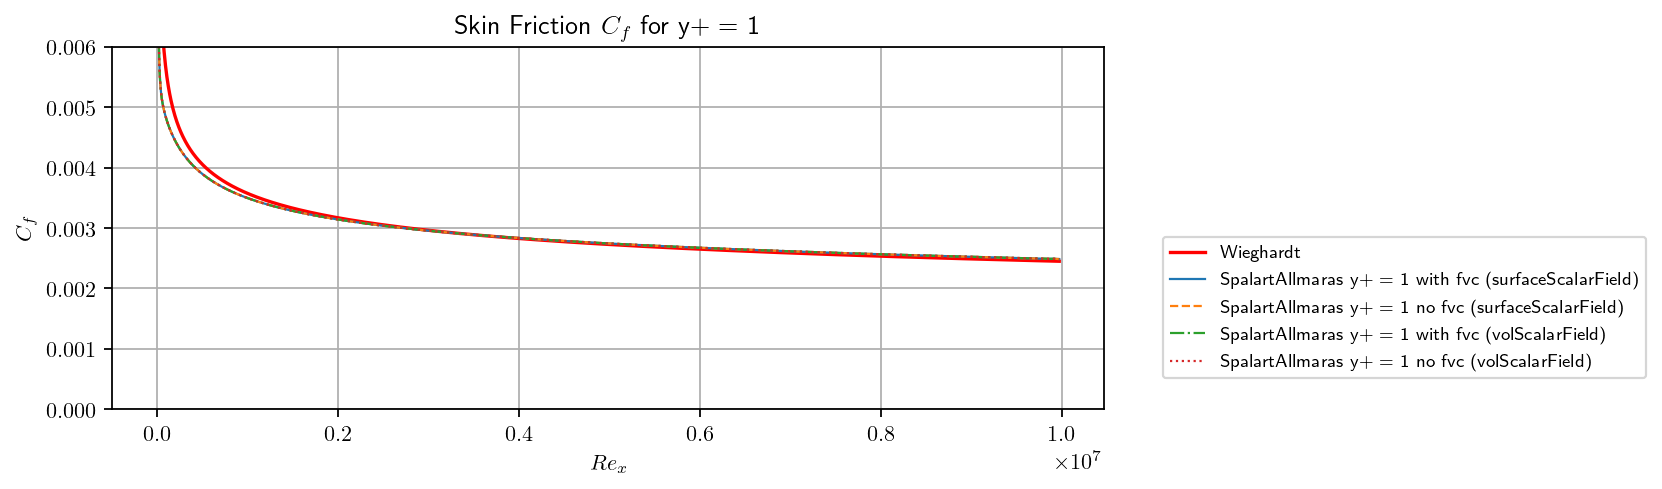

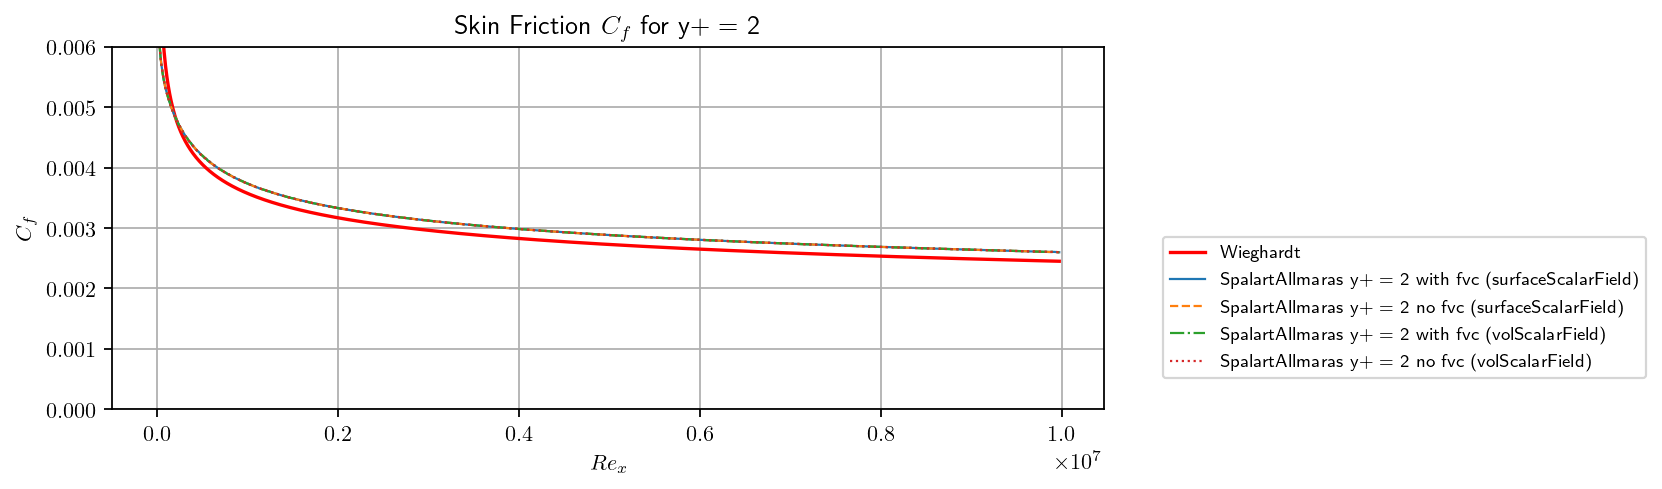

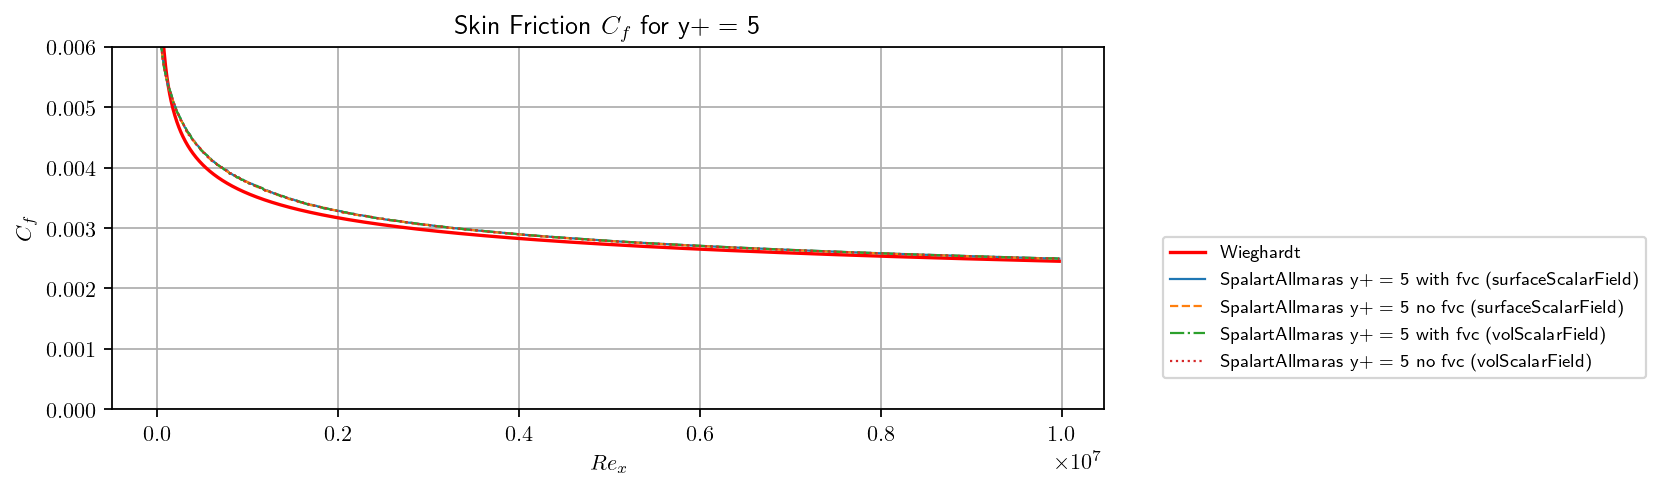

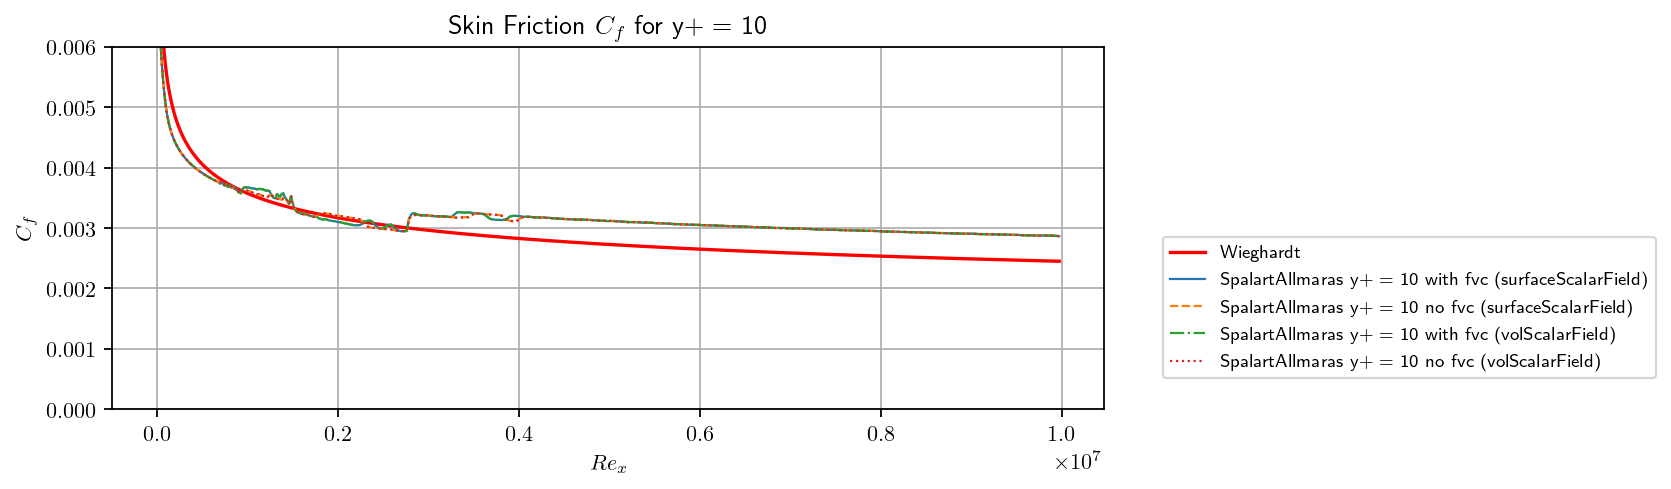

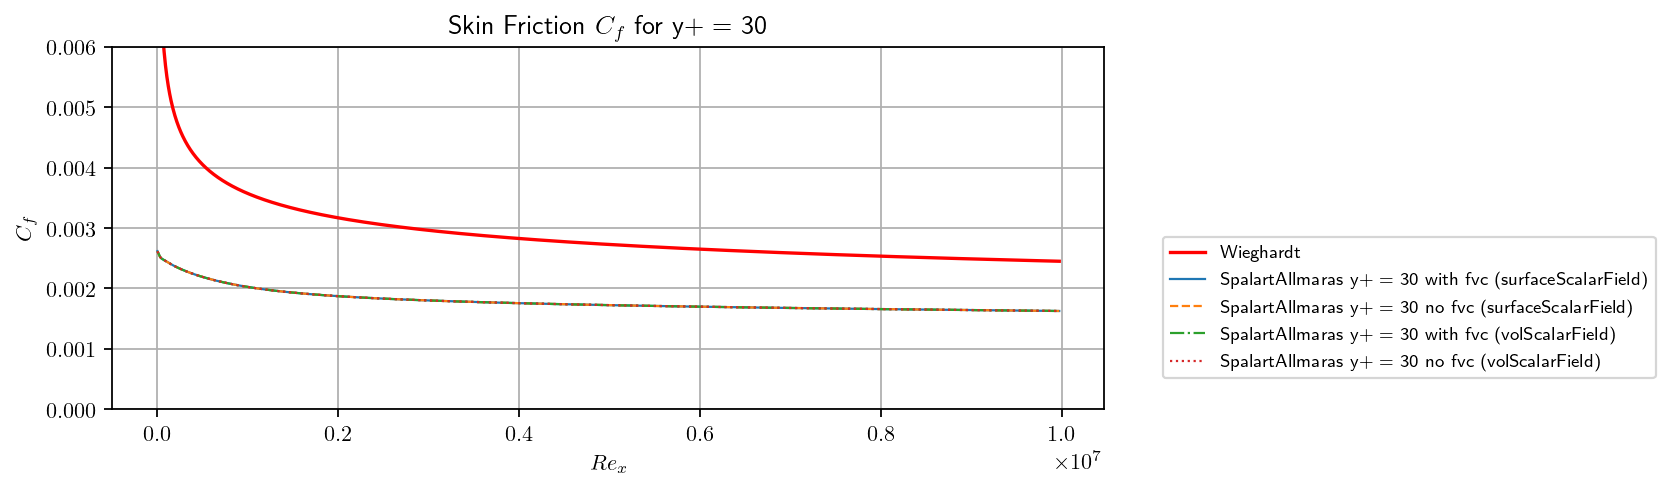

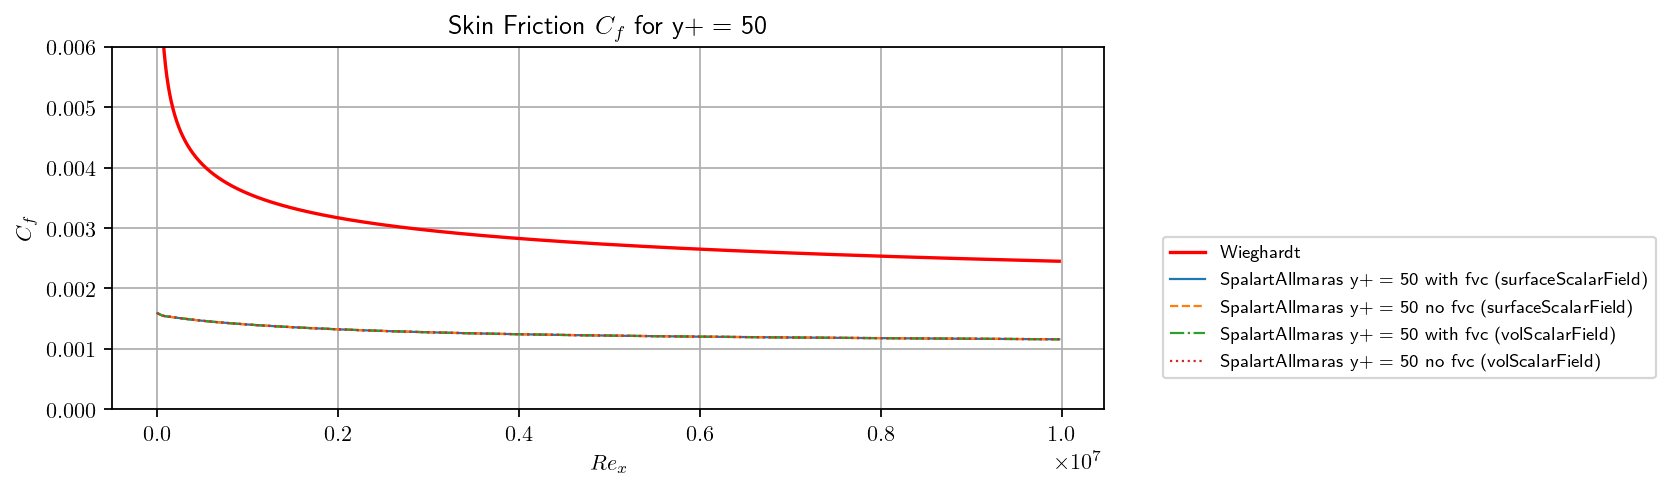

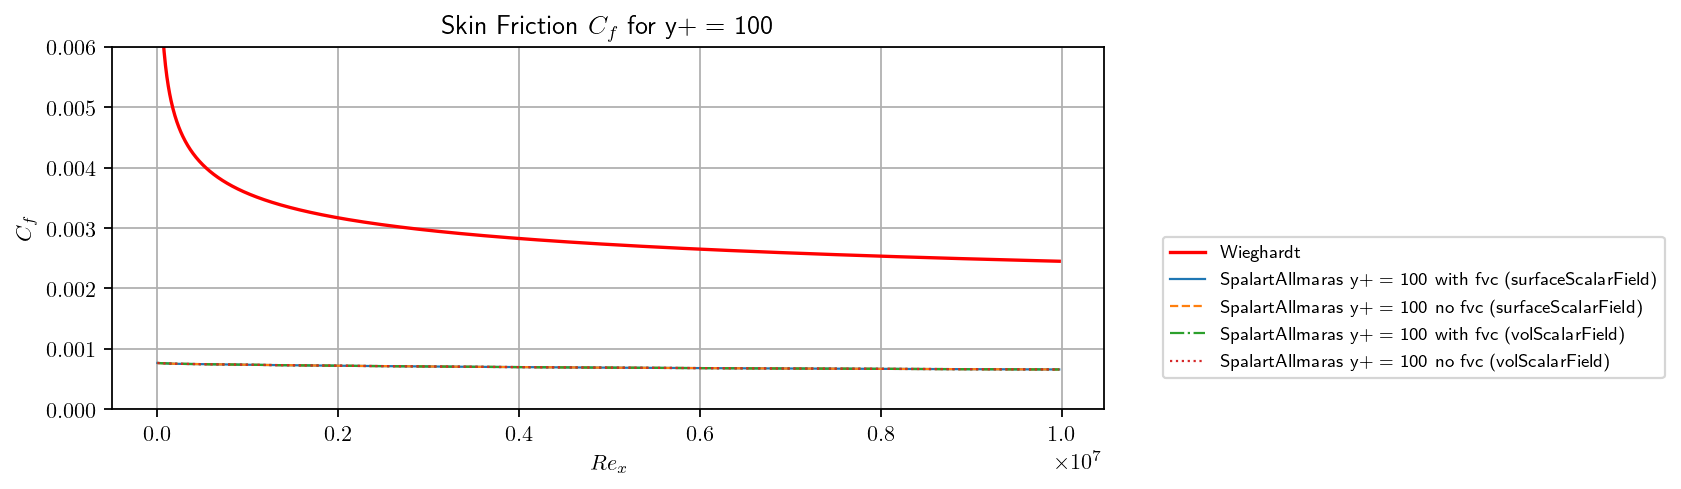

In [11]:
style2 = ["-", "--", "-.", ":"]
lw2 = 1.0
for j in range(len(yp)):
    fig2, ax2 = plt.subplots(1, 1, figsize=(8, 3))
    plt.ylim([0, 0.006])
    plt.grid()
    ax2.set_xlabel(r"$Re_x$")
    ax2.set_ylabel(r"$C_f$")
    plt.title(r"Skin Friction $C_f$ for y+ = {}".format(yp[j]))
    ax2.plot(Rex, wieghardt, color = "r", label = "Wieghardt")    
    for i in range(len(res_list)):
        ax2.plot(Rex, Cf_fvc[i + len(res_list)*j], label = "{} y+ = {} with fvc (surfaceScalarField)".format(model_sa, yp[j]), ls = style2[i], c = "C{:d}".format(i), lw = lw2)
        ax2.plot(Rex, Cf_nofvc[i + len(res_list)*j], label = "{} y+ = {} no fvc (surfaceScalarField)".format(model_sa, yp[j]), ls = style2[i+1], c = "C{:d}".format(i+1), lw = lw2)
        ax2.plot(Rex, Cf_fvc_vol[i + len(res_list)*j], label = "{} y+ = {} with fvc (volScalarField)".format(model_sa, yp[j]), ls = style2[i+2], c = "C{:d}".format(i+2), lw = lw2)
        ax2.plot(Rex, Cf_nofvc_vol[i + len(res_list)*j], label = "{} y+ = {} no fvc (volScalarField)".format(model_sa, yp[j]), ls = style2[i+3], c = "C{:d}".format(i+3), lw = lw2)
        ax2.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.5))